# BAM Networks

In [1]:
clear all, close all, clc
addpath("pattern")
pkg load image

In [2]:
function W = encode(X,Y) 
    n_patterns = size(X,1)
    W=zeros(size(X,2), size(Y,2));
    for i=1:n_patterns
        W=W+(X(i,:)'*Y(i,:));
    end
    
    W = W./n_patterns;
end

In [3]:
function Y = decode(X,Y,W)
    Y=feval('tanh',X*W);
    X=feval('tanh',Y*W');   
    Y2=[];
    while ~isequal(Y,Y2)
        Y=Y2;
        Y2=feval('tanh',X*W);
        X=feval('tanh',Y2*W');
    end
end

## Get data

height =  20
width =  18


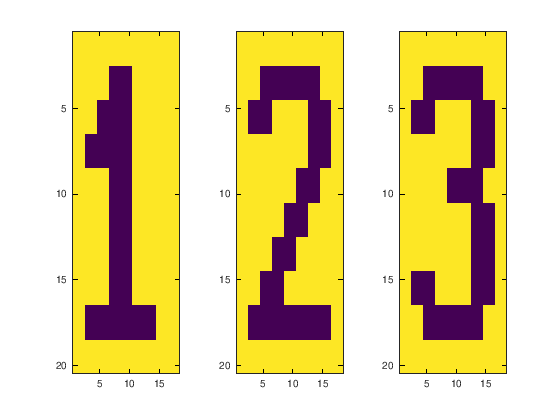

In [4]:
numbers = ['1', '2', '3'];
n_numbers = length(numbers);

for i=1:n_numbers
    p{i} = text2im(numbers(i));
end

figure;
for i=1:n_numbers
    subplot(1,3,i),imagesc(p{i});
end

[height, width] = size(p{1})

## Create Dataset

In [51]:
X = zeros(n_numbers, height * width);

for i=1:n_numbers
    X(i,:) = p{i}(:)';
end

# change values to interval [-1, 1]
X = 2 * X - 1;

# Binary representation of 1, 2 3
Y=[-1 -1 1; -1 1 -1; 1 1 -1];

In [52]:
%Calculo de W.
W = encode(X, Y);

n_patterns =  3


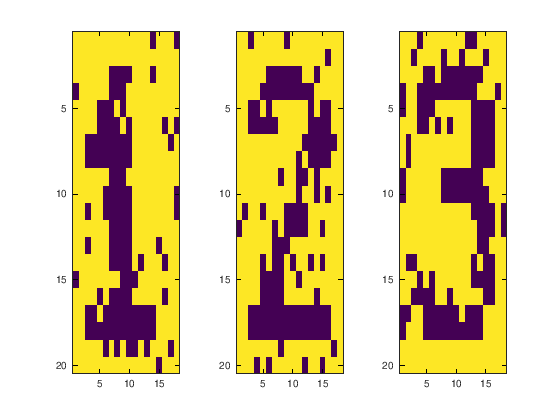

In [49]:
for i=1: n_numbers
    p_salt_pepper{i} = imnoise(p{i}, 'salt & pepper', 0.2);
end

figure;
for i=1:n_numbers
    subplot(1,3,i),imagesc(p_salt_pepper{i});
end

In [53]:
for i=1:n_numbers
    X_noise(i,:) = p_salt_pepper{i}(:)';
end

# change values to interval [-1, 1]
X_noise = 2 * X_noise - 1;
Y_predict = decode(X_noise,Y,W)
Y

Y_predict =

  -1  -1   1
  -1   1  -1
   1   1  -1

Y =

  -1  -1   1
  -1   1  -1
   1   1  -1

